In [42]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics as sk
from PIL import Image
from tqdm import tqdm
import torch
import sklearn

In [40]:
TRAIN_IMAGES_PATH = './data/images/train'
TEST_IMAGES_PATH = './data/images/test'
VAL_IMAGES_PATH = './data/images/val'

TRAIN_NPZ_FILE = './data/images/npz/train_images.npz'
TEST_NPZ_FILE = './data/images/npz/test_images.npz'
VAL_NPZ_FILE = './data/images/npz/val_images.npz'

NUM_FEATURES = 224 * 224 * 3

In [7]:
def preprocess_images_to_numpy_arrays(input_dir, output_file, img_size=224, grayscale=False):
    images, labels = [], []
    directories = [d for d in os.listdir(input_dir) if d!='.DS_Store']
    class_names = sorted(directories)
    class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in tqdm(class_names, desc='Processing classes'):
        class_dir = os.path.join(input_dir, class_name)
        image_names = [img for img in os.listdir(class_dir) if img.endswith(('jpg', 'jpeg'))]
        print(f'Processing {class_dir} directory')
        
        for img_name in image_names:
            if type(img_name)== str:
                img_path = os.path.join(class_dir, img_name)
                img = Image.open(img_path)
                if grayscale:
                    img = img.convert("L")
                else:
                    img = img.convert("RGB")
                img = img.resize((img_size, img_size), Image.Resampling.LANCZOS)
                img_array = np.array(img, dtype=np.float32)/255.0

                images.append(img_array)
                labels.append(class_to_idx[class_name])
                
    images = np.stack(images)
    labels = np.array(labels)

    np.savez_compressed(output_file, images=images, labels=labels, classes=class_names)
    print(f"Saved preprocessed data to {output_file}")

In [8]:
preprocess_images_to_numpy_arrays(input_dir=TRAIN_IMAGES_PATH, output_file=TRAIN_NPZ_FILE)

Processing classes:   0%|                                | 0/14 [00:00<?, ?it/s]

Processing ./data/images/train/Actinic keratoses directory


Processing classes:   7%|█▋                      | 1/14 [00:09<01:58,  9.12s/it]

Processing ./data/images/train/Basal cell carcinoma directory


Processing classes:  14%|███▍                    | 2/14 [00:20<02:04, 10.37s/it]

Processing ./data/images/train/Benign keratosis-like lesions directory


Processing classes:  21%|█████▏                  | 3/14 [00:27<01:37,  8.87s/it]

Processing ./data/images/train/Chickenpox directory


Processing classes:  29%|██████▊                 | 4/14 [00:27<00:55,  5.55s/it]

Processing ./data/images/train/Cowpox directory


Processing classes:  36%|████████▌               | 5/14 [00:29<00:36,  4.01s/it]

Processing ./data/images/train/Dermatofibroma directory


Processing classes:  43%|██████████▎             | 6/14 [00:31<00:26,  3.32s/it]

Processing ./data/images/train/HFMD directory


Processing classes:  50%|████████████            | 7/14 [00:34<00:23,  3.31s/it]

Processing ./data/images/train/Healthy directory


Processing classes:  57%|█████████████▋          | 8/14 [00:35<00:15,  2.54s/it]

Processing ./data/images/train/Measles directory


Processing classes:  64%|███████████████▍        | 9/14 [00:35<00:09,  1.94s/it]

Processing ./data/images/train/Melanocytic nevi directory


Processing classes:  71%|████████████████▍      | 10/14 [00:44<00:16,  4.03s/it]

Processing ./data/images/train/Melanoma directory


Processing classes:  79%|██████████████████     | 11/14 [00:52<00:15,  5.09s/it]

Processing ./data/images/train/Monkeypox directory


Processing classes:  86%|███████████████████▋   | 12/14 [00:53<00:07,  3.82s/it]

Processing ./data/images/train/Squamous cell carcinoma directory


Processing classes:  93%|█████████████████████▎ | 13/14 [00:59<00:04,  4.49s/it]

Processing ./data/images/train/Vascular lesions directory


Processing classes: 100%|███████████████████████| 14/14 [01:01<00:00,  4.37s/it]


Saved preprocessed data to ./data/images/train_images.npz


In [9]:
preprocess_images_to_numpy_arrays(input_dir=TEST_IMAGES_PATH, output_file=TEST_NPZ_FILE)

Processing classes:   0%|                                | 0/14 [00:00<?, ?it/s]

Processing ./data/images/test/Actinic keratoses directory


Processing classes:   7%|█▋                      | 1/14 [00:01<00:15,  1.22s/it]

Processing ./data/images/test/Basal cell carcinoma directory


Processing classes:  14%|███▍                    | 2/14 [00:02<00:12,  1.03s/it]

Processing ./data/images/test/Benign keratosis-like lesions directory


Processing classes:  36%|████████▌               | 5/14 [00:03<00:03,  2.29it/s]

Processing ./data/images/test/Chickenpox directory
Processing ./data/images/test/Cowpox directory
Processing ./data/images/test/Dermatofibroma directory


Processing classes:  43%|██████████▎             | 6/14 [00:03<00:03,  2.61it/s]

Processing ./data/images/test/HFMD directory


Processing classes:  64%|███████████████▍        | 9/14 [00:03<00:01,  3.79it/s]

Processing ./data/images/test/Healthy directory
Processing ./data/images/test/Measles directory
Processing ./data/images/test/Melanocytic nevi directory


Processing classes:  71%|████████████████▍      | 10/14 [00:04<00:01,  2.47it/s]

Processing ./data/images/test/Melanoma directory


Processing classes:  79%|██████████████████     | 11/14 [00:05<00:01,  2.04it/s]

Processing ./data/images/test/Monkeypox directory
Processing ./data/images/test/Squamous cell carcinoma directory


Processing classes:  93%|█████████████████████▎ | 13/14 [00:06<00:00,  2.25it/s]

Processing ./data/images/test/Vascular lesions directory


Processing classes: 100%|███████████████████████| 14/14 [00:06<00:00,  2.15it/s]


Saved preprocessed data to ./data/images/test_images.npz


In [10]:
preprocess_images_to_numpy_arrays(input_dir=VAL_IMAGES_PATH, output_file=VAL_NPZ_FILE)

Processing classes:   0%|                                | 0/14 [00:00<?, ?it/s]

Processing ./data/images/val/Actinic keratoses directory


Processing classes:   7%|█▋                      | 1/14 [00:01<00:15,  1.18s/it]

Processing ./data/images/val/Basal cell carcinoma directory


Processing classes:  14%|███▍                    | 2/14 [00:02<00:13,  1.09s/it]

Processing ./data/images/val/Benign keratosis-like lesions directory


Processing classes:  36%|████████▌               | 5/14 [00:03<00:04,  2.18it/s]

Processing ./data/images/val/Chickenpox directory
Processing ./data/images/val/Cowpox directory
Processing ./data/images/val/Dermatofibroma directory


Processing classes:  43%|██████████▎             | 6/14 [00:03<00:03,  2.60it/s]

Processing ./data/images/val/HFMD directory


Processing classes:  64%|███████████████▍        | 9/14 [00:03<00:01,  4.21it/s]

Processing ./data/images/val/Healthy directory
Processing ./data/images/val/Measles directory
Processing ./data/images/val/Melanocytic nevi directory


Processing classes:  71%|████████████████▍      | 10/14 [00:04<00:01,  2.58it/s]

Processing ./data/images/val/Melanoma directory


Processing classes:  79%|██████████████████     | 11/14 [00:05<00:01,  2.02it/s]

Processing ./data/images/val/Monkeypox directory
Processing ./data/images/val/Squamous cell carcinoma directory


Processing classes:  93%|█████████████████████▎ | 13/14 [00:06<00:00,  2.26it/s]

Processing ./data/images/val/Vascular lesions directory


Processing classes: 100%|███████████████████████| 14/14 [00:06<00:00,  2.16it/s]


Saved preprocessed data to ./data/images/val_images.npz


In [20]:
def load_and_visualize_npy(file_path, dataset, idx=0):
    data = np.load(file_path, allow_pickle=True)
    images, labels, class_names = data['images'], data['labels'], data['classes']

    image = images[idx]
    label = labels[idx]
    class_name = class_names[label]

    plt.imshow(image)
    plt.title(f"Class: {class_name} in  {dataset}")
    plt.axis("off")
    plt.show()

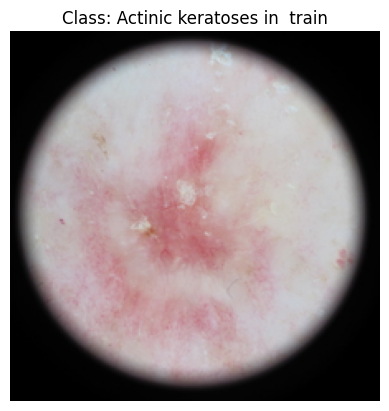

In [15]:
load_and_visualize_npy(TRAIN_NPZ_FILE, 'train', idx=10)

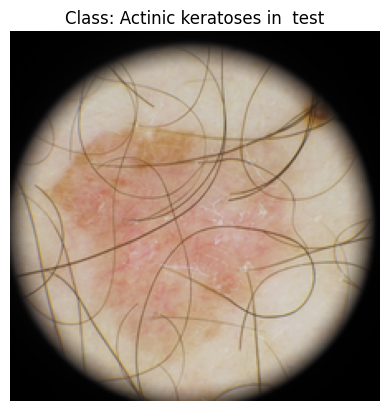

In [21]:
load_and_visualize_npy(TEST_NPZ_FILE, 'test', idx=5)

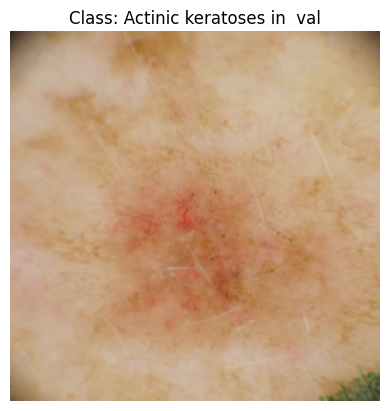

In [17]:
load_and_visualize_npy(VAL_NPZ_FILE, 'val', idx=5)

In [22]:
def load_npz_as_tensors(file_path):
    data = np.load(file_path, allow_pickle=True)

    images = data['images']
    labels = data['labels']

    images_tensor = torch.tensor(images, dtype=torch.float32)
    labels_tensor = torch.tensor(labels, dtype=torch.long)

    return images_tensor, labels_tensor

In [34]:
train_images.shape

torch.Size([10940, 224, 224, 3])

In [37]:
# Construct and scale adjacency matrix


In [39]:
adj_matrix = adj_matrix > THRESHOLD

In [41]:
def process_data(sparcity):
    # Load training data
    train_images, train_labels = load_npz_as_tensors(TRAIN_NPZ_FILE)
    train_data = train_images.reshape(train_images.shape[0], NUM_FEATURES)
    num_train = train_images.shape[0]

    # Load validation data
    val_images, val_labels = load_npz_as_tensors(VAL_NPZ_FILE)
    val_data = val_images.reshape(val_images.shape[0], NUM_FEATURES)
    num_val = val_images.shape[0]

    # Load test data
    test_images, test_labels = load_npz_as_tensors(TEST_NPZ_FILE)
    test_data = test_images.reshape(test_images.shape[0], NUM_FEATURES)
    num_test = test_images.shape[0]

    # Concatenate train, validation, and test data
    num_data = num_train + num_val + num_test
    data_feat = np.concatenate((train_data, val_data, test_data), axis=0)
    data_label = np.concatenate((train_labels, val_labels, test_labels), axis=0).reshape(-1)

    # Construct and scale adjacency matrix
    adj_matrix = sk.pairwise.cosine_similarity(data_feat, data_feat)
    adj_matrix = (adj_matrix - adj_matrix.min())/(adj_matrix.max()-adj_matrix.min())

    # Apply sparsity thresholds
    threshold = 0.977 if sparcity else 0.970

    adj_matrix = adj_matrix > threshold

    # Generate masks
    train_mask = np.zeros(num_data, dtype=bool)
    train_mask[:num_train] = True
    val_mask = np.zeros(num_data, dtype=bool)
    val_mask[num_train:num_train + num_val] = True
    test_mask = np.zeros(num_data, dtype=bool)
    test_mask[num_train + num_val:] = True

    # Save masks, features, labels, and edge index
    suffix = 'sparse' if sparsity else 'dense'
    base_path = f"./data/images/{suffix}"

    np.savez_compressed(f"{base_path}/train_mask.npz", train_mask=train_mask)
    np.savez_compressed(f"{base_path}/val_mask.npz", val_mask=val_mask)
    np.savez_compressed(f"{base_path}/test_mask.npz", test_mask=test_mask)
    np.savez_compressed(f"{base_path}/data_feat.npz", data_feat=data_feat)
    np.savez_compressed(f"{base_path}/data_label.npz", data_label=data_label)

    # Generate and save edge index
    edge_index = np.array([[i, j] for i in range(num_data) for j in range(num_data) if i != j and adj_matrix[i, j]])
    np.savez_compressed(f"{base_path}/edge_index.npz", edge_index=edge_index)

    print(f"View-({'Sparse' if sparsity else 'Dense'}) generated!")

In [ ]:
# Call the function with sparsity parameter
process_data(sparsity=True)
process_data(sparsity=False)

In [ ]:
def print_statistics(features, labels, edge_index, train_mask, val_mask, test_mask):
    print("=============== Dataset Properties ==================")
    print(f"Total Nodes: {features.shape[0]}")
    print(f"Total Edges: {edge_index.shape[0]}")
    print(f"Number of Features: {features.shape[1]}")
    if labels.ndim == 1:
        print(f"Number of Labels: {labels.max() + 1}")
        print("Task Type: Multi-class Classification")
    else:
        print(f"Number of Labels: {labels.shape[1]}")
        print("Task Type: Multi-label Classification")
    print(f"Training Nodes: {train_mask.sum().item()}")
    print(f"Validation Nodes: {val_mask.sum().item()}")
    print(f"Testing Nodes: {test_mask.sum().item()}")
    print()

In [ ]:
def get_dataset(sparse=True, balanced=True):
    print(f"Loading Dataset")
    
    # Load masks
    suffix = 'sparse' if sparse else 'dense'
    train_mask = torch.tensor(np.load(f"./data/images/{suffix}/train_mask.npz"))
    val_mask = torch.tensor(np.load(f"./data/images/{suffix}/val_mask.npz"))
    test_mask = torch.tensor(np.load(f"./data/images/{suffix}/test_mask.npz"))

    # Load labels
    labels = np.load(f"./data/images/{suffix}/data_label.npz")

    # Load and normalize features
    labels = npload(f"./data/images/{suffix}/data_features.npz")
    features = sklearn.preprocessing.StandardScaler().fit_transform(features)

    # Load edge indices
    edge_index = np.load(f"./data/images/{suffix}/edge_index.npz")

    # Print dataset statistics
    print_statistics(features, labels, edge_index, train_mask, val_mask, test_mask)

    if not balanced:
        all_labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
        chosen_labels = [0, 1, 2, 4]

        print("[Before unbalancing] Class distribution in the training set:")
        for label in all_labels:
                count = np.sum(labels[train_mask] == label)
                print(f"Label {label}: {count} samples")
        print("[Before unbalancing] Class distribution in the validation set:")
        for label in all_labels:
                count = np.sum(labels[val_mask] == label)
                print(f"Label {label}: {count} samples")

        print("[Before unbalancing] Class distribution in the test set:")
        for label in all_labels:
                count = np.sum(labels[test_mask] == label)
                print(f"Label {label}: {count} samples")        